# 타이타닉 생존자 예측

- 컬럼 정보
    - survived : 생존여부(1: 생존, 0 : 사망)
    - pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
    - name : 승객 이름
    - sex : 승객 성별
    - age : 승객 나이
    - sibsp : 동반한 형제자매, 배우자 수
    - parch : 동반한 부모, 자식 수
    - ticket : 티켓의 고유 넘버
    - fare 티켓의 요금
    - cabin : 객실 번호
    - embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
    - boat
    - body
    - home.dest


In [1]:
import pandas as pd

tit_df = pd.read_csv('titanic3.csv')
tit_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
tit_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## 전처리 종류
- 결측값 제거
- 불필요한(중복) 컬럼 제거
- 파생변수 생성
- encoding

In [3]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
tit_df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [5]:
display(tit_df.pivot_table(index = ['pclass','sex'], values = 'survived', aggfunc = 'mean'))
# display(tit_df.pivot_table(index = ['pclass','family'], values = 'survived', aggfunc = 'mean'))

survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130

C:\Users\admin\anaconda3\envs\cakd7\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


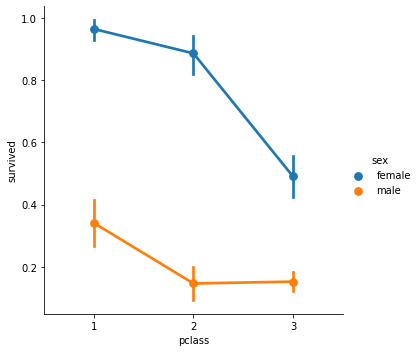

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# f, ax = plt.subplots(1,2, figsize=(20,8))

sns.factorplot(x = 'pclass', y = 'survived', hue = 'sex', data = tit_df)    
# sns.factorplot(x = 'family', y = 'survived', hue = 'pclass', data = tit_df)

### 불필요한 컬럼 삭제

In [7]:
tit_df = tit_df.drop(['cabin','boat','body','home.dest'], axis = 1)
tit_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,C


#### family 컬럼 생성: sibsp + parch

In [8]:
tit_df['family'] = tit_df['sibsp'] + tit_df['parch']
tit_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,C,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,C,0


In [9]:
pd.options.display.max_rows = 790
tit_df[tit_df['family'] == 0].sort_values('survived')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
721,3,0,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,S,0
854,3,0,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,Q,0
855,3,0,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C,0
859,3,0,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,Q,0
861,3,0,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,S,0
863,3,0,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,S,0
864,3,0,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,0
865,3,0,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,Q,0
868,3,0,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,S,0
869,3,0,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.5250,S,0


### 결측값 제거

#### fare null값 채우기

In [10]:
tit_df[tit_df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [11]:
tit_df[tit_df['ticket'] == '3701']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [12]:
pd.options.display.max_rows = 120

tit_df.pivot_table(index = ['survived','pclass','sex','sibsp','parch'], values = ['fare'], aggfunc = ['mean','min','max'])

mean       min       max
                                          fare      fare      fare
survived pclass sex    sibsp parch                                
0        1      female 0     0       30.195850   28.7125   31.6792
                       1     0      221.779200  221.7792  221.7792
                             2      151.550000  151.5500  151.5500
                male   0     0       43.335524    0.0000  227.5250
                             1      101.230957   29.7000  247.5208
                             2      162.387500  113.2750  211.5000
                       1     0       90.671229   51.8625  227.5250
                             1      116.365471   71.0000  211.5000
                             2      151.550000  151.5500  151.5500
                             3      262.375000  262.3750  262.3750
                             4      263.000000  263.0000  263.0000
                       2     0       90.000000   90.0000   90.0000
                       3     2      263.000000  263.0000  263.0000
         2      female 0     0       15.250000   10.5000   21.0000
                       1     0       24.750000   21.0000   26.0000
                             1       19.500000   13.0000   26.0000
                male   0     0       15.699959    0.0000   73.5000
                             1       27.000000   21.0000   33.0000
                             2       26.000000   26.0000   26.0000
                       1     0       23.186591   10.5000   30.0708
                             1       31.964886   26.0000   39.0000
                             2       44.776400   27.7500   65.0000
                       2     0       56.700000   31.5000   73.5000
                             1       11.500000   11.5000   11.5000
         3      female 0     0        9.057580    6.7500   39.6875
                             1       13.123633   10.4625   14.4542
                             2       15.552767    7.7500   24.1500
                             4       23.270850   21.0750   25.4667
                             5       34.406250   29.1250   39.6875
                       1     0       13.521619    7.9250   18.0000
                             1       15.741138   10.4625   24.1500
                             2       23.450000   23.4500   23.4500
                             3       34.375000   34.3750   34.3750
                             4       27.900000   27.9000   27.9000
                             5       31.275000   31.2750   31.2750
                             6       46.900000   46.9000   46.9000
                             9       69.550000   69.5500   69.5500
                       2     0       13.331250    8.6625   18.0000
                             2       34.375000   34.3750   34.3750
                       3     1       23.710020   21.0750   25.4667
                             2       27.900000   27.9000   27.9000
                       4     2       26.575000    7.7750   31.2750
                       5     2       46.900000   46.9000   46.9000
                       8     2       69.550000   69.5500   69.5500
                male   0     0        8.550979    0.0000   56.4958
                             1       12.252100    8.4042   16.1000
                             2       14.094800    7.2292   20.2500
                       1     0       13.237227    6.4375   24.1500
                             1       15.028531    7.2292   24.1500
                             2       22.491667   20.5750   23.4500
                             3       34.375000   34.3750   34.3750
                             4       27.900000   27.9000   27.9000
                             5       31.331250   31.2750   31.3875
                             6       46.900000   46.9000   46.9000
                             9       69.550000   69.5500   69.5500
                       2     0       16.182582    7.9250   24.1500
                             2       34.375000   34.3750   34.3750
                      

In [13]:
fare_con = tit_df.loc[(tit_df['pclass'] == 3)&(tit_df['family'] == 0)&(tit_df['survived'] == 0),'fare'].unique()
fare_con

array([ 7.55  ,  7.25  ,  8.05  ,  7.8875,  7.925 ,  7.05  ,  8.3   ,
       22.525 ,  7.775 ,  7.8542,  7.8958,  7.225 , 14.4583,  7.8792,
        9.35  ,  7.2292,  4.0125,  7.75  , 16.1   ,  7.7958,  7.2833,
        6.75  ,  8.6625,  7.7333,  7.4958,  7.6292,  8.1583, 10.5167,
       10.1708,  9.5   ,  6.975 , 15.1   ,  6.95  ,  7.7417, 14.5   ,
        7.85  ,  8.3625,  9.8458,  8.85  ,  6.8583, 18.7875,  6.45  ,
        7.65  ,  6.4958,  8.6542,  0.    ,  7.125 ,  8.4333,  7.5208,
        7.8292,  7.7375,  9.5875, 56.4958,  9.4833,  6.4375, 24.15  ,
        7.0542, 15.5   ,  8.4583,  7.8   ,  6.2375,  9.225 ,  7.3125,
        9.2167,  8.7125,  7.    ,  8.1375,  8.1125, 39.6875,  7.7292,
        7.575 ,  9.325 ,  7.725 ,     nan,  9.8375,  9.    ,  7.875 ])

In [14]:
import numpy as np

fare_con = np.where(fare_con<50,fare_con,np.nan)
fare_con =fare_con[np.logical_not(np.isnan(fare_con))]
fare_con.mean()

9.288776

In [15]:
tit_df.loc[1225, 'fare'] = fare_con.mean()

In [16]:
tit_df[tit_df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family


In [17]:
#티켓값이 0인 이유는..?모름..

tit_df[tit_df['fare'] == 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S,0
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,S,0
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,S,0
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,0
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,S,0
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S,0
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,0
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S,0
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S,0
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S,0


#### age null값 채우기

In [18]:
pd.options.display.max_rows = 270
tit_df[tit_df['age'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,S,0
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,S,0
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,C,0
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,S,0
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,C,0
69,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,S,1
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,S,0
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,S,0
80,1,0,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,S,0
106,1,0,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,S,0


In [19]:
pd.options.display.max_rows = 120

age_null_rep = tit_df.pivot_table(index = ['survived','pclass','sex','sibsp','parch'], values = ['age'], aggfunc = ['mean','min','max', 'std']).round(1)
age_null_rep

mean   min   max   std
                                     age   age   age   age
survived pclass sex    sibsp parch                        
0        1      female 0     0      43.0  36.0  50.0   9.9
                       1     0      63.0  63.0  63.0   NaN
                             2      13.5   2.0  25.0  16.3
                male   0     0      44.0  17.0  71.0  13.0
                             1      41.4  21.0  65.0  16.1
                             2      42.5  27.0  58.0  21.9
                       1     0      40.6  18.0  67.0  13.9
                             1      52.9  37.0  70.0   9.9
                             2      30.0  30.0  30.0   NaN
                             3      61.0  61.0  61.0   NaN
                             4      64.0  64.0  64.0   NaN
                       2     0      44.0  44.0  44.0   NaN
                       3     2      19.0  19.0  19.0   NaN
         2      female 0     0      34.2  22.0  57.0  14.2
                       1     0      40.0  27.0  60.0  15.3
                             1      22.0  18.0  26.0   5.7
                male   0     0      32.8  14.0  70.0  12.8
                             1      35.5  28.0  43.0  10.6
                             2      36.5  36.5  36.5   NaN
                       1     0      34.8  21.0  63.0  10.5
                             1      36.6  19.0  60.0  13.1
                             2      36.7  25.0  49.0  12.0
                       2     0      24.6  21.0  32.0   4.3
                             1      23.0  23.0  23.0   NaN
         3      female 0     0      25.0  14.0  45.0   7.1
                             1      21.7   2.0  45.0  21.7
                             2      28.2  10.0  41.0  13.7
                             4      29.0  29.0  29.0   NaN
                             5      40.0  39.0  41.0   1.4
                       1     0      26.5  14.5  47.0   9.5
                             1      16.8   1.0  32.0  14.1
                             3      48.0  48.0  48.0   NaN
                             4      45.0  45.0  45.0   NaN
                             5      39.0  39.0  39.0   NaN
                             6      43.0  43.0  43.0   NaN
                       2     0      20.0  18.0  22.0   2.8
                             2      15.0   9.0  21.0   8.5
                       3     1       5.5   3.0   8.0   3.5
                             2       5.5   2.0   9.0   4.9
                       4     2      13.2   2.0  38.0  14.3
                       5     2      13.0  10.0  16.0   4.2
                male   0     0      28.8  11.0  74.0  10.5
                             1      43.0  42.0  44.0   1.4
                             2      23.2   0.3  40.5  19.8
                       1     0      26.5  17.0  50.0   7.7
                             1      20.4   0.8  40.0  12.5
                             2      26.0  26.0  26.0   NaN
                             3      16.0  16.0  16.0   NaN
                             4      40.0  40.0  40.0   NaN
                             5      39.5  39.0  40.0   0.7
                             6      40.0  40.0  40.0   NaN
                       2     0      26.2  16.0  41.0   8.9
                             2      18.0  18.0  18.0   NaN
                       3     0      31.0  31.0  31.0   NaN
                             1       4.0   2.0   6.0   2.8
                             2       7.0   4.0  10.0   4.2
                       4     1       7.1   1.0  16.0   5.1
                             2       7.8   4.0  13.0   4.1
                       5     2       8.8   1.0  14.0   5.6
                       8     2      14.5  14.5  14.5   NaN
1        1      female 0     0      36.1  16.0  62.0  11.7
                             1      36.6  15.0  58.0  16.4
                             2      31.7  18.0  64.0  17.4
                       1     0      37.2  17.0  76.0  14.8
                             1      45.3  27.0  64.0   9.5
                        

In [20]:
age_null_rep2 = age_null_rep.reset_index()
age_null_rep2[age_null_rep2[('std','age')]>20]

,survived,pclass,sex,sibsp,parch,mean,min,max,std
,,,,,,age,age,age,age
5,0,1,male,0,2,42.5,27.0,58.0,21.9
25,0,3,female,0,1,21.7,2.0,45.0,21.7
101,1,3,female,1,2,16.6,0.2,33.0,23.2


In [21]:
display(tit_df[(tit_df['survived']==0)&(tit_df['pclass']==1)&(tit_df['sex']=='male')&(tit_df['sibsp']==0)&(tit_df['parch']==2)])
display(tit_df[(tit_df['survived']==0)&(tit_df['pclass']==3)&(tit_df['sex']=='female')&(tit_df['sibsp']==0)&(tit_df['parch']==1)])
display(tit_df[(tit_df['survived']==1)&(tit_df['pclass']==3)&(tit_df['sex']=='female')&(tit_df['sibsp']==1)&(tit_df['parch']==2)])
display()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
215,1,0,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.275,C,2
313,1,0,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.500,C,2


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
665,3,0,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,C,1
666,3,0,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,C,1
1230,3,0,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,S,1


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.575,S,3
765,3,1,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.00,1,2,C.A. 2315,20.575,S,3


In [22]:
age_null_rep2

,survived,pclass,sex,sibsp,parch,mean,min,max,std
,,,,,,age,age,age,age
0,0,1,female,0,0,43.0,36.0,50.0,9.9
1,0,1,female,1,0,63.0,63.0,63.0,NaN
2,0,1,female,1,2,13.5,2.0,25.0,16.3
3,0,1,male,0,0,44.0,17.0,71.0,13.0
4,0,1,male,0,1,41.4,21.0,65.0,16.1
5,0,1,male,0,2,42.5,27.0,58.0,21.9
6,0,1,male,1,0,40.6,18.0,67.0,13.9
7,0,1,male,1,1,52.9,37.0,70.0,9.9
8,0,1,male,1,2,30.0,30.0,30.0,NaN


In [23]:
import warnings
warnings.filterwarnings('ignore')


for i in list(tit_df[tit_df['age'].isnull()].index):
    try:
        tit_df.loc[i, 'age'] = float(age_null_rep2.loc[ (age_null_rep2[('survived',)] == tit_df.loc[i, 'survived'])&
                                                         (age_null_rep2[('pclass',)] == tit_df.loc[i,'pclass'])&
                                                         (age_null_rep2[('sex',)] == tit_df.loc[i, 'sex'])&
                                                         (age_null_rep2[('sibsp',)] == tit_df.loc[i, 'sibsp'])&
                                                         (age_null_rep2[('parch',)] == tit_df.loc[i,'parch']), ('mean','age')])
    except:
        pass

In [24]:
tit_df[tit_df['age'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family
901,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,3
903,3,0,"Johnston, Mrs. Andrew G (Elizabeth ""Lily"" Watson)",female,NaN,1,2,W./C. 6607,23.45,S,3
1001,3,1,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.25,Q,2
1002,3,1,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.25,Q,2
1003,3,1,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,Q,2
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,S,10
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,S,10
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,S,10
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,S,10
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,S,10


In [25]:
age_null_rep3 = tit_df.pivot_table(index = ['survived','pclass','sibsp','parch'], values = ['age'], aggfunc = ['mean','std']).round(1).reset_index()
age_null_rep3[age_null_rep3[('pclass',)] == 3]

,survived,pclass,sibsp,parch,mean,std
,,,,,age,age
18,0,3,0,0,28.4,8.4
19,0,3,0,1,30.2,19.3
20,0,3,0,2,26.2,14.1
21,0,3,0,4,29.0,0.0
22,0,3,0,5,40.0,1.4
23,0,3,1,0,26.5,6.6
24,0,3,1,1,19.0,12.6
25,0,3,1,2,26.0,0.0
26,0,3,1,3,32.0,22.6


In [26]:
tit_df.age.mean()

29.695046224961533

In [27]:
tit_df.loc[[901,903], 'age'] = 26.0
tit_df.loc[[1001,1002,1003,1004], 'age'] = 25.3
tit_df.loc[[1172,1173,1174,1175,1176], 'age'] = 29.7
tit_df.loc[[1179,1180,1181], 'age'] = 29.7

In [28]:
tit_df[tit_df['age'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family


#### age_category 컬럼 생성: age 범주화

In [29]:
def age_cate(x):
    if x<10:
        y = 0  
    else:
        y = int(str(x)[0])
    return y

tit_df['age_category'] = tit_df['age'].apply(lambda x: age_cate(x))
tit_df['age_category']

0       2
1       0
2       0
3       3
4       2
       ..
1304    1
1305    2
1306    2
1307    2
1308    2
Name: age_category, Length: 1309, dtype: int64

In [84]:
sorted(tit_df['age_category'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8]

#### embark null값 채우기

In [30]:
tit_df[tit_df['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,0,3
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,0,6


In [31]:
tit_df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [32]:
tit_df['embarked'] = tit_df['embarked'].fillna('S')

In [33]:
tit_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
family          0
age_category    0
dtype: int64

#### marriage 컬럼 생성: 여자/남자 기혼여부 

In [34]:
tit_df['marriage'] = tit_df['name'].apply(lambda x: x.split(',')[1].split('.')[0])
tit_df['marriage'].unique()

array([' Miss', ' Master', ' Mr', ' Mrs', ' Col', ' Mme', ' Dr', ' Major',
       ' Capt', ' Lady', ' Sir', ' Mlle', ' Dona', ' Jonkheer',
       ' the Countess', ' Don', ' Rev', ' Ms'], dtype=object)

In [35]:
tit_df['marriage'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Ms                2
 Major             2
 Capt              1
 Sir               1
 Dona              1
 Jonkheer          1
 the Countess      1
 Don               1
 Mme               1
 Lady              1
Name: marriage, dtype: int64

- Miss: 미혼 여성
- Mrs: 기혼 여성
- Ms: 기혼/미혼 여부 밝히지 않은 여성
- Mr: 기혼/미혼 여부 밝히지 않은 남성
- Master: 미혼 남성(청소년)

- Mme: (프랑스) 마담, 기혼 여성 윗사람을 높여부르는 말  -> Mrs
- Mlle: (프랑스) 마드모아젤, 미혼 여성 ->Miss

- Dona: (스페인) 남성 윗사람 높여부르는 말  -> Mr
- Don: (스페인) 여성 윗사람 높여부르는 말   -> Ms
- Sir: 남성 윗사람을 높여부르는 말  ->Mr
- Col: 남성  -> Mr
- Capt: 남성  ->Mr
- Dr: 의사   ->Mr, Ms
- Rev: 목사  -> Mr
- Major: 남성    -> Mr
- Lady: 여성   ->Ms
- Jonkheer: 남성   -> Mr
- the Countess: 여성   -> Ms

In [36]:
display(tit_df[tit_df['marriage'].isin([' Col'])])
display(tit_df[tit_df['marriage'].isin([' Dr'])])
display(tit_df[tit_df['marriage'].isin([' Major'])])
display(tit_df[tit_df['marriage'].isin([' Capt'])])
display(tit_df[tit_df['marriage'].isin([' Sir'])])
display(tit_df[tit_df['marriage'].isin([' Dona'])])
display(tit_df[tit_df['marriage'].isin([' Jonkheer'])])
display(tit_df[tit_df['marriage'].isin([' the Countess'])])
display(tit_df[tit_df['marriage'].isin([' Don'])])
display(tit_df[tit_df['marriage'].isin([' Rev'])])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C,1,4,Col
136,1,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.500,C,0,5,Col
264,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.500,C,0,5,Col
305,1,0,"Weir, Col. John",male,60.0,0,0,113800,26.550,S,0,6,Col


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
40,1,0,"Brewe, Dr. Arthur Jackson",male,44.0,0,0,112379,39.6000,C,0,4,Dr
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,S,2,5,Dr
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,2,5,Dr
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,0,4,Dr
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,2,4,Dr
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C,0,3,Dr
508,2,0,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S,0,5,Dr
525,2,0,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,0,2,Dr


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
45,1,0,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,S,0,4,Major
231,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,S,0,5,Major


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,S,2,7,Capt


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,C,1,4,Sir


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,0,3,Dona


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,0,3,Jonkheer


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,S,0,3,the Countess


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
299,1,0,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,0,4,Don


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
335,2,0,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,S,0,5,Rev
357,2,0,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,S,0,4,Rev
366,2,0,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,S,1,5,Rev
431,2,0,"Harper, Rev. John",male,28.0,0,1,248727,33.000,S,1,2,Rev
472,2,0,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,Q,0,5,Rev
476,2,0,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.000,S,2,3,Rev
507,2,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S,0,2,Rev
532,2,0,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.000,S,0,4,Rev


In [37]:
tit_df = tit_df.replace([' Col',' Dr', ' Major', ' Capt', ' Lady', ' Sir', ' Dona', ' Jonkheer', ' the Countess', ' Don', ' Rev', ' Mlle',' Mme'],
                  [' Mr',' Mr', ' Mr', ' Mr', ' Ms', ' Mr', ' Ms', ' Mr', ' Ms', ' Mr', ' Mr',' Miss',' Mrs'], regex = True)

tit_df.loc[181,'marriage'] = ' Ms'

In [38]:
tit_df['marriage'].unique()

array([' Miss', ' Master', ' Mr', ' Mrs', ' Ms'], dtype=object)

#### fare_category 컬럼 생성: fare 범주화

In [39]:
tit_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family,age_category,marriage
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,0,2,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,3,0,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,3,0,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,3,3,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,3,2,Mrs


In [40]:
tit_df.corr()

,pclass,survived,age,sibsp,parch,fare,family,age_category
pclass,1.000000,-0.312469,-0.431905,0.060832,0.018322,-0.558730,0.050027,-0.442542
survived,-0.312469,1.000000,-0.055573,-0.027825,0.082660,0.244466,0.026876,-0.031090
age,-0.431905,-0.055573,1.000000,-0.225880,-0.144876,0.185447,-0.227759,0.975911
sibsp,0.060832,-0.027825,-0.225880,1.000000,0.373587,0.160381,0.861952,-0.221664
parch,0.018322,0.082660,-0.144876,0.373587,1.000000,0.221661,0.792296,-0.140568
fare,-0.558730,0.244466,0.185447,0.160381,0.221661,1.000000,0.226645,0.182170
family,0.050027,0.026876,-0.227759,0.861952,0.792296,0.226645,1.000000,-0.222632
age_category,-0.442542,-0.031090,0.975911,-0.221664,-0.140568,0.182170,-0.222632,1.000000


In [41]:
tit_df['fare'].describe()

count    1309.000000
mean       33.277140
std        51.743134
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [42]:
tit_df.pivot_table(index = ['pclass'], values = 'fare', aggfunc = ['min', 'max', 'mean', 'std'])

,min,max,mean,std
,fare,fare,fare,fare
pclass,,,,
1,0.0,512.3292,87.508992,80.447178
2,0.0,73.5000,21.179196,13.607122
3,0.0,69.5500,13.297227,11.487227


In [43]:
tit_df2 = tit_df.copy()
tit_df2.drop(index = tit_df2[tit_df2['fare']==0].index).pivot_table(index = ['pclass'], values = 'fare', aggfunc = ['min', 'max', 'mean', 'std'])

,min,max,mean,std
,fare,fare,fare,fare
pclass,,,,
1,5.0000,512.3292,89.447482,80.259713
2,9.6875,73.5000,21.648108,13.382064
3,3.1708,69.5500,13.372672,11.475879


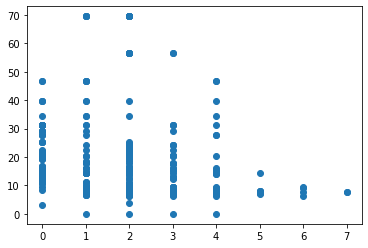

In [44]:
plt.scatter(tit_df.loc[tit_df['pclass'] == 3,'age_category'],tit_df.loc[tit_df['pclass'] == 3,'fare'])

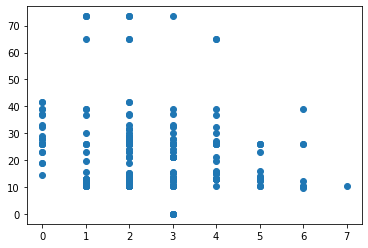

In [45]:
plt.scatter(tit_df.loc[tit_df['pclass'] == 2,'age_category'],tit_df.loc[tit_df['pclass'] == 2,'fare'])

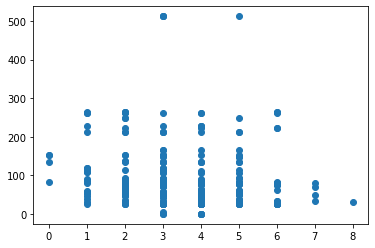

In [46]:
plt.scatter(tit_df.loc[tit_df['pclass'] == 1,'age_category'],tit_df.loc[tit_df['pclass'] == 1,'fare'])

In [47]:
def fare_category(x):
    if x<50: y = 1
    elif x<100: y =2
    elif x<150: y = 3
    elif x<200: y = 4
    elif x<250: y = 5
    elif x<300: y = 6
    else: y = 7
        
    return y

tit_df['fare_category'] = tit_df['fare'].apply(lambda x: fare_category(x))

In [48]:
titanic_df = tit_df[['survived','pclass','age_category','fare_category','marriage','family','embarked']]
titanic_df

,survived,pclass,age_category,fare_category,marriage,family,embarked
0,1,1,2,5,Miss,0,S
1,1,1,0,4,Master,3,S
2,0,1,0,4,Miss,3,S
3,0,1,3,4,Mr,3,S
4,0,1,2,4,Mrs,3,S
...,...,...,...,...,...,...,...
1304,0,3,1,1,Miss,1,C
1305,0,3,2,1,Miss,1,C
1306,0,3,2,1,Mr,0,C
1307,0,3,2,1,Mr,0,C


### encoding

In [51]:
titanic_df[['survived','pclass','age_category','fare_category','family']]

,survived,pclass,age_category,fare_category,family
0,1,1,2,5,0
1,1,1,0,4,3
2,0,1,0,4,3
3,0,1,3,4,3
4,0,1,2,4,3
...,...,...,...,...,...
1304,0,3,1,1,1
1305,0,3,2,1,1
1306,0,3,2,1,0
1307,0,3,2,1,0


In [53]:
pd.get_dummies(titanic_df[['marriage','embarked']])

,marriage_ Master,marriage_ Miss,marriage_ Mr,marriage_ Mrs,marriage_ Ms,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1304,0,1,0,0,0,1,0,0
1305,0,1,0,0,0,1,0,0
1306,0,0,1,0,0,1,0,0
1307,0,0,1,0,0,1,0,0


In [71]:
tit_df_3 = pd.concat([titanic_df[['survived','pclass','age_category','fare_category','family']],pd.get_dummies(titanic_df[['marriage','embarked']])], axis = 1)
tit_df_3

,survived,pclass,age_category,fare_category,family,marriage_ Master,marriage_ Miss,marriage_ Mr,marriage_ Mrs,marriage_ Ms,embarked_C,embarked_Q,embarked_S
0,1,1,2,5,0,0,1,0,0,0,0,0,1
1,1,1,0,4,3,1,0,0,0,0,0,0,1
2,0,1,0,4,3,0,1,0,0,0,0,0,1
3,0,1,3,4,3,0,0,1,0,0,0,0,1
4,0,1,2,4,3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,1,1,0,1,0,0,0,1,0,0
1305,0,3,2,1,1,0,1,0,0,0,1,0,0
1306,0,3,2,1,0,0,0,1,0,0,1,0,0
1307,0,3,2,1,0,0,0,1,0,0,1,0,0


In [79]:
tit_df_3.columns

Index(['survived', 'pclass', 'age_category', 'fare_category', 'family',
       'marriage_ Master', 'marriage_ Miss', 'marriage_ Mr', 'marriage_ Mrs',
       'marriage_ Ms', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

### 내가 전처리하지 않은 파일

In [72]:
# tit_df_not = pd.read_pickle('tdf.pkl')
# tit_df_not

In [73]:
# tit_df.columns

In [74]:
# 데이터 분리
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 
y_tdf = tit_df_3['survived']
x_tdf = tit_df_3.drop(['survived'], axis = 1)

# 학습용 데이터:평가용 데이터 = 8:2 로 분리
X_train, X_test, y_train, y_test = train_test_split(x_tdf, y_tdf, test_size = 0.2, random_state = 11)
print(X_train.shape, X_test.shape)

(1047, 12) (262, 12)


In [76]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)    # 학습해라.. 분류능력 키워라..
rf_pred = rf_model.predict(X_test)    # 예측해..
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)   # 비교해봐~


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_pred).round(2)

print(f'rf 정확도: {accuracy_rf}, lr 정확도: {accuracy_lr}')

rf 정확도: 0.79, lr 정확도: 0.84


In [77]:
import pickle
import joblib

filename = 'tcl_model.pkl'
joblib.dump(lr_model, filename)     

['tcl_model.pkl']

In [78]:
# 파일 불러오기: 객체가 나올 것

mdl = joblib.load('tcl_model.pkl')
mdl

LogisticRegression()

In [82]:
# 입력값 넣어보기 -> 데이터프레임형태로 넣어줘야 함
# 예측

data = [ 1, 2, 4, 2, 0, 1, 0, 0, 0, 1, 0, 0]
db_df = pd.DataFrame(columns = ['pclass', 'age_category', 'fare_category', 'family',
       'marriage_ Master', 'marriage_ Miss', 'marriage_ Mr', 'marriage_ Mrs',
       'marriage_ Ms', 'embarked_C', 'embarked_Q', 'embarked_S'])
db_df.loc[0] = data
y_pred = mdl.predict(db_df)
y_pred

array([1], dtype=int64)